In [2]:
import torch
import energyflow as ef
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = ef.zjets_delphes.load("Herwig", num_data=-1, pad=True, cache_dir='../data/zplusjets/',
                                       source='zenodo', which='all',
                                       include_keys=['mults'])

In [4]:
true_diff = data['gen_mults'] - data['sim_mults']

In [6]:
print(true_diff.min(), true_diff.max())

-53 78


In [71]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Reshape true_diff to 2D array for GaussianMixture
X = true_diff.reshape(-1, 1)

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

GaussianMixture(n_components=3, random_state=42)

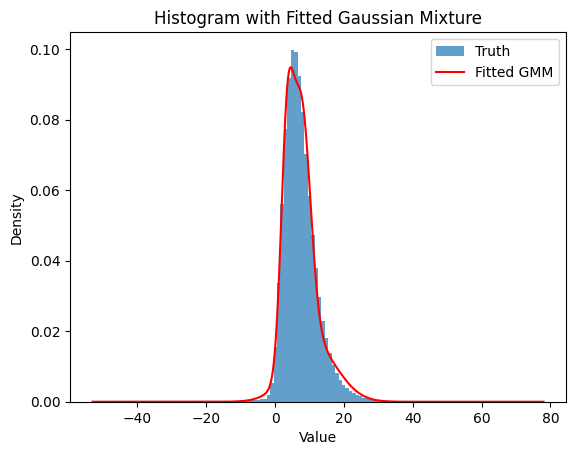

In [72]:
# Generate points for plotting the fitted distribution
x = np.linspace(min(true_diff), max(true_diff), 1000).reshape(-1, 1)
y = np.exp(gmm.score_samples(x))

# Plot histogram of true data and fitted mixture
plt.hist(true_diff, bins=max(true_diff) - min(true_diff) + 1, density=True, alpha=0.7, label='Truth')
plt.plot(x, y, 'r-', label='Fitted GMM')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram with Fitted Gaussian Mixture')
plt.legend()
plt.show()

In [73]:
-gmm.score_samples(X).mean()

2.9337386063763193

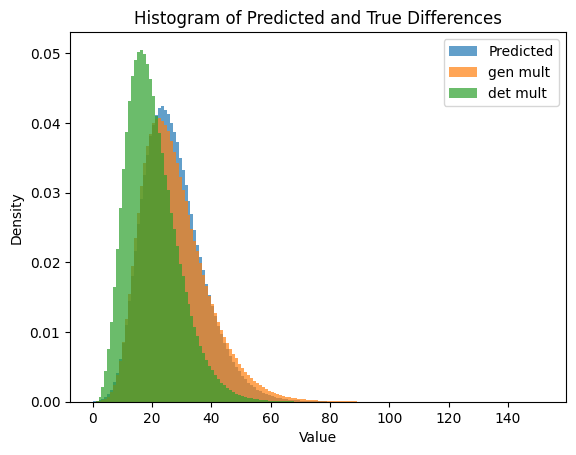

In [77]:
predicted_diff = gmm.sample(n_samples=len(true_diff))[0].flatten()
plt.hist(predicted_diff + data['sim_mults'], bins=np.arange(0,153), density=True, alpha=0.7, label='Predicted')
plt.hist(data['gen_mults'], bins=np.arange(0,153), density=True, alpha=0.7, label='gen mult')
plt.hist(data['sim_mults'], bins=np.arange(0,153), density=True, alpha=0.7, label='det mult')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Predicted and True Differences')
plt.legend()
plt.show()